In [1]:
!pip3 install /Users/wenyun/Desktop/DSH/DSHpy_2024

Processing /Users/wenyun/Desktop/DSH/DSHpy_2024
  Preparing metadata (setup.py) ... done
  Created wheel for DSH: filename=DSH-1.0-py3-none-any.whl size=113124 sha256=61e944ad0392b763550cf66685a6708274014fb0308da2d9e40552e9396a2bff
  Stored in directory: /private/var/folders/wf/qxrbnsmd4xn7cplm95fm264w0000gn/T/pip-ephem-wheel-cache-48vf8oyj/wheels/50/cf/c6/3fb987c904337737999b9dc00c0173ee55e48c84f0bdc6586b
Successfully built DSH
  Attempting uninstall: DSH
    Found existing installation: DSH 1.0
    Uninstalling DSH-1.0:
      Successfully uninstalled DSH-1.0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import DSH
from DSH import Kernel
from DSH import MIfile as MI
from DSH import CorrMaps as CM
import seaborn as sns
import pickle

In [3]:
def mask_heatmap(center,radius_out,heatmap):
    x_center=center[1]
    y_center=center[0]
    x = np.arange(heatmap.shape[0])
    y = np.arange(heatmap.shape[1])
    xv, yv = np.meshgrid(x,y)
    xv -= x_center
    yv -= y_center
    radius = np.sqrt(xv**2 + yv**2)
    mask=(radius<radius_out)
    heatmap_masked=heatmap*mask
    return heatmap_masked

<Kernel [2D Gauss], 9x9, s=(3.2;3.2)>


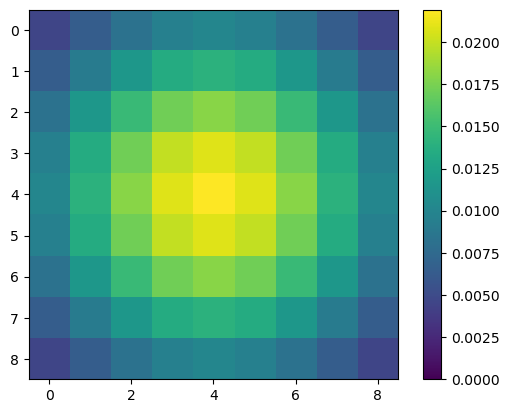

In [4]:
KernelSpecs = DSH.Kernel.Kernel()
KernelSpecs.Initialize(shape=(9,9), kernel_type='Gauss', params={'sigma':[3.2,3.2]}, padding=True)
print(KernelSpecs)
plt.imshow(KernelSpecs.ToMatrix(), vmin=0)
plt.colorbar()

# Sample #2 35 min

In [4]:
fname = '/Volumes/T7red/silk_more/20240219/sample2/analysis/35min_derotate.raw'
metadata_fname = '/Volumes/T7red/silk_more/20240219/sample2/analysis/35min.ini'
mi_file = MI.MIfile(fname, metadata_fname)

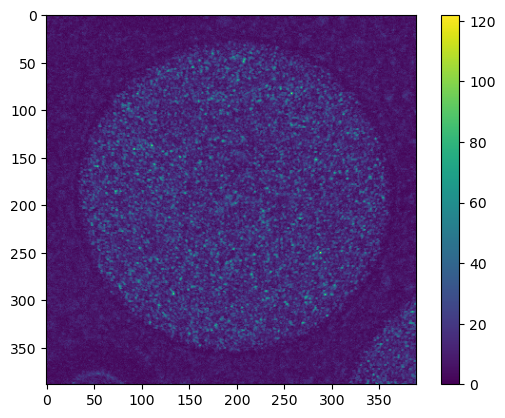

In [5]:
mi_file.OpenForReading()
full_frame = mi_file.GetImage(0)
plt.imshow(full_frame)
plt.colorbar()

In [6]:
print(mi_file.MetaData)


|---------------|
| Config class: |
|---------------+---------------
| Section count : 1
| Total keys    : 5
| MIfile        : <5 keys>
|                 hdr_len = 0
|                 px_format = B
|                 fps = 11.11
|                 px_size = 0.346
|                 shape = [632, 389, 389]
|---------------+---------------


In [7]:
froot='/Volumes/T7red/silk_more/20240219/analysis/35min'
#test_ROI=[28,26,343,331] #x,y,w,h
#test_ROI=[100,110,50,60]
test_ROI=[0,0,-1,-1]
KernelSpecs.SetPadding(True)
corrmap = CM.CorrMaps(mi_file, froot, [200], KernelSpecs, imgRange=[0,300,1], cropROI=test_ROI)
cmap_list = corrmap.Compute(silent=False, return_maps=True)

Computing correlation maps:
  STEP 1: Loading images and computing average intensity...
  STEP 2: Computing contrast...
  STEP 3: Computing correlations...
     ...lag 200
Procedure completed in 29.9 seconds!


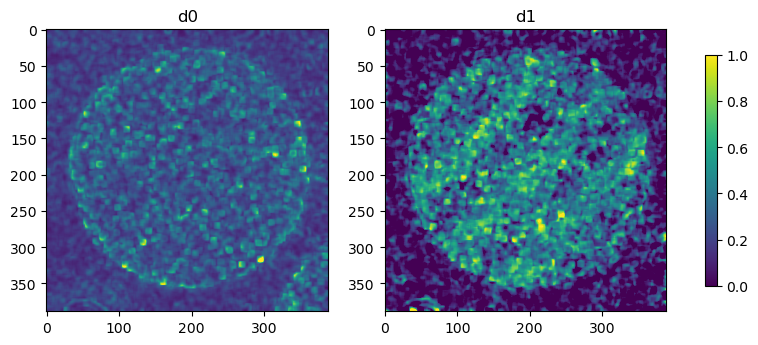

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tidx = 0
lagidx = 1
ax1.set_title('d0')
ax1.imshow(cmap_list[0][tidx], vmin=0.0, vmax=1.0)
ax2.set_title('d'+str(lagidx))
cbar = ax2.imshow(cmap_list[lagidx][tidx], vmin=0.0, vmax=1.0)
fig.colorbar(cbar, ax=[ax1, ax2], shrink=0.5)

# Sample1 33 min


|---------------|
| Config class: |
|---------------+---------------
| Section count : 1
| Total keys    : 5
| MIfile        : <5 keys>
|                 hdr_len = 0
|                 px_format = B
|                 fps = 1
|                 px_size = 1
|                 shape = [1411, 322, 322]
|---------------+---------------


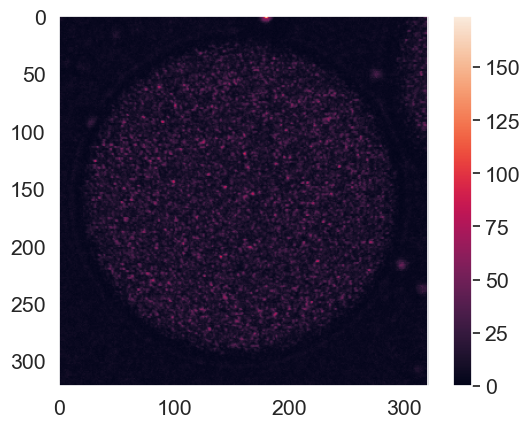

In [118]:
froot='/Volumes/T7red/silk_more/20240219/analysis/33min/'
fname = froot+'33min_derotate.raw'
metadata_fname = froot+'33min.ini'
mi_file = MI.MIfile(fname, metadata_fname)
mi_file.OpenForReading()
full_frame = mi_file.GetImage(0)
plt.imshow(full_frame)
plt.colorbar()
plt.grid(False)
print(mi_file.MetaData)

In [61]:
test_ROI=[0,0,-1,-1]
KernelSpecs.SetPadding(True)
corrmap = CM.CorrMaps(mi_file, froot, [200], KernelSpecs, imgRange=[0,300,1], cropROI=test_ROI)
cmap_list = corrmap.Compute(silent=False, return_maps=True)
with open(froot+'cmap_list.pkl', 'wb') as file:
    # Use pickle.dump() to serialize and save the list to the file
    pickle.dump(cmap_list, file)

Computing correlation maps:
  STEP 1: Loading images and computing average intensity...
  STEP 2: Computing contrast...
  STEP 3: Computing correlations...
     ...lag 200
Procedure completed in 20.2 seconds!


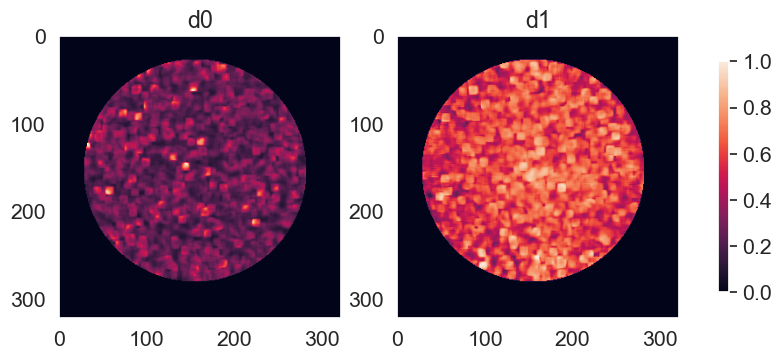

In [119]:
center=[153,155]
radius_outer=(263-9)/2

with open(froot+'cmap_list.pkl', 'rb') as file:
    # Use pickle.load() to deserialize the pickled list
    cmap_list = pickle.load(file)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tidx = 11
lagidx = 1
ax1.set_title('d0')
ax1.imshow(mask_heatmap(center,radius_outer,cmap_list[0][tidx]), vmin=0.0, vmax=1.0)
ax1.grid(False)
ax2.set_title('d'+str(lagidx))
cbar = ax2.imshow(mask_heatmap(center,radius_outer, np.mean(np.stack(cmap_list[lagidx][0:50]), axis=0)), vmin=0.0, vmax=1.0)
ax2.grid(False)
fig.colorbar(cbar, ax=[ax1, ax2], shrink=0.5)

# Sample2 22min


|---------------|
| Config class: |
|---------------+---------------
| Section count : 1
| Total keys    : 5
| MIfile        : <5 keys>
|                 hdr_len = 0
|                 px_format = B
|                 fps = 11.11
|                 px_size = 0.346
|                 shape = [657, 389, 389]
|---------------+---------------


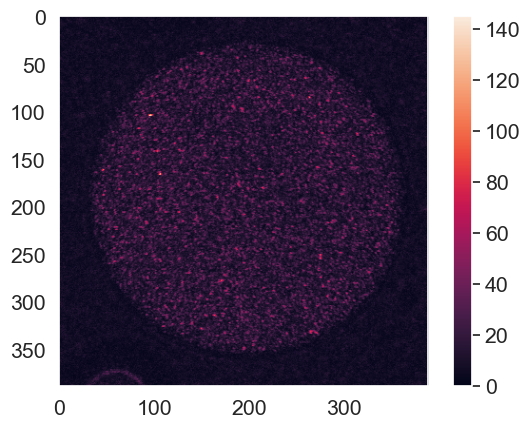

In [116]:
froot='/Volumes/T7red/silk_more/20240219/analysis/22min/'
fname = froot+'22min.raw'
metadata_fname = froot+'22min.ini'
mi_file = MI.MIfile(fname, metadata_fname)
mi_file.OpenForReading()
full_frame = mi_file.GetImage(0)
plt.imshow(full_frame)
plt.colorbar()
plt.grid(False)
print(mi_file.MetaData)

In [57]:
test_ROI=[0,0,-1,-1]
KernelSpecs.SetPadding(True)
corrmap = CM.CorrMaps(mi_file, froot, [200], KernelSpecs, imgRange=[0,300,1], cropROI=test_ROI)
cmap_list = corrmap.Compute(silent=False, return_maps=True)
with open(froot+'cmap_list.pkl', 'wb') as file:
    # Use pickle.dump() to serialize and save the list to the file
    pickle.dump(cmap_list, file)

Computing correlation maps:
  STEP 1: Loading images and computing average intensity...
  STEP 2: Computing contrast...
  STEP 3: Computing correlations...
     ...lag 200
Procedure completed in 31.9 seconds!


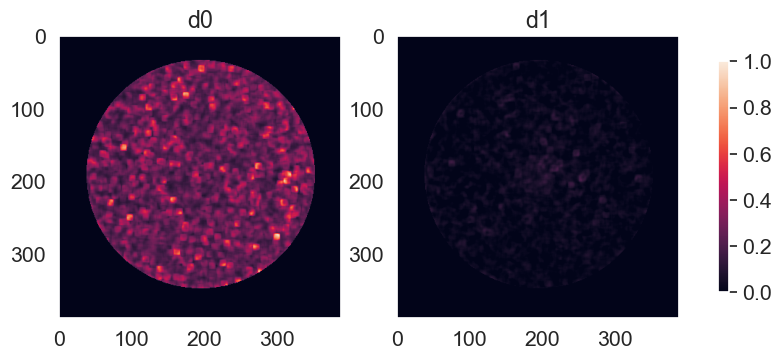

In [117]:
center=[190,195]
radius_outer=(324-9)/2

with open(froot+'cmap_list.pkl', 'rb') as file:
    # Use pickle.load() to deserialize the pickled list
    cmap_list = pickle.load(file)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tidx = 11
lagidx = 1
ax1.set_title('d0')
ax1.imshow(mask_heatmap(center,radius_outer,cmap_list[0][tidx]), vmin=0.0, vmax=1.0)
ax1.grid(False)
ax2.set_title('d'+str(lagidx))
cbar = ax2.imshow(mask_heatmap(center,radius_outer, np.mean(np.stack(cmap_list[lagidx][0:50]), axis=0)), vmin=0.0, vmax=1.0)
ax2.grid(False)
fig.colorbar(cbar, ax=[ax1, ax2], shrink=0.5)

# Sample2 24min


|---------------|
| Config class: |
|---------------+---------------
| Section count : 1
| Total keys    : 5
| MIfile        : <5 keys>
|                 hdr_len = 0
|                 px_format = B
|                 fps = 1
|                 px_size = 1
|                 shape = [667, 389, 389]
|---------------+---------------


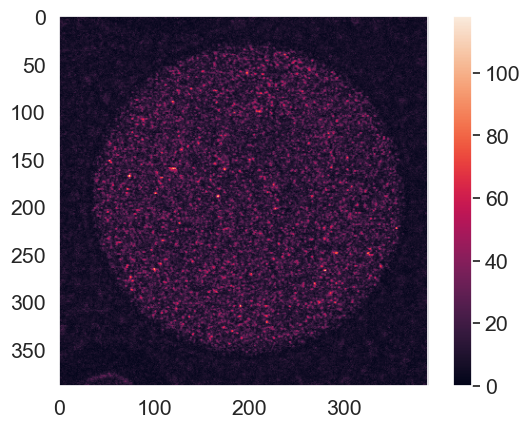

In [114]:
froot='/Volumes/T7red/silk_more/20240219/analysis/24min/'
fname = froot+'24min.raw'
metadata_fname = froot+'24min.ini'
mi_file = MI.MIfile(fname, metadata_fname)
mi_file.OpenForReading()
full_frame = mi_file.GetImage(0)
plt.imshow(full_frame)
plt.colorbar()
plt.grid(False)
print(mi_file.MetaData)

In [54]:
test_ROI=[0,0,-1,-1]
KernelSpecs.SetPadding(True)
corrmap = CM.CorrMaps(mi_file, froot, [200], KernelSpecs, imgRange=[0,300,1], cropROI=test_ROI)
cmap_list = corrmap.Compute(silent=False, return_maps=True)
with open(froot+'cmap_list.pkl', 'wb') as file:
    # Use pickle.dump() to serialize and save the list to the file
    pickle.dump(cmap_list, file)

Computing correlation maps:
  STEP 1: Loading images and computing average intensity...
  STEP 2: Computing contrast...
  STEP 3: Computing correlations...
     ...lag 200
Procedure completed in 31.5 seconds!


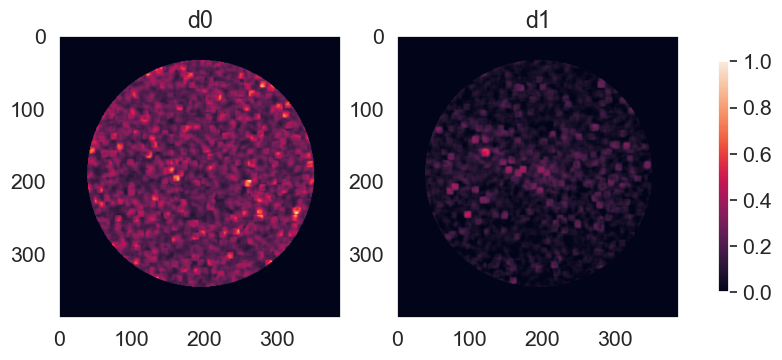

In [115]:
center=[189,195]
radius_outer=(322-9)/2

with open(froot+'cmap_list.pkl', 'rb') as file:
    # Use pickle.load() to deserialize the pickled list
    cmap_list = pickle.load(file)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tidx = 11
lagidx = 1
ax1.set_title('d0')
ax1.imshow(mask_heatmap(center,radius_outer,cmap_list[0][tidx]), vmin=0.0, vmax=1.0)
ax1.grid(False)
ax2.set_title('d'+str(lagidx))
cbar = ax2.imshow(mask_heatmap(center,radius_outer, np.mean(np.stack(cmap_list[lagidx][0:50]), axis=0)), vmin=0.0, vmax=1.0)
ax2.grid(False)
fig.colorbar(cbar, ax=[ax1, ax2], shrink=0.5)

# sample2 28min


|---------------|
| Config class: |
|---------------+---------------
| Section count : 1
| Total keys    : 5
| MIfile        : <5 keys>
|                 hdr_len = 0
|                 px_format = B
|                 fps = 1
|                 px_size = 1
|                 shape = [485, 389, 389]
|---------------+---------------


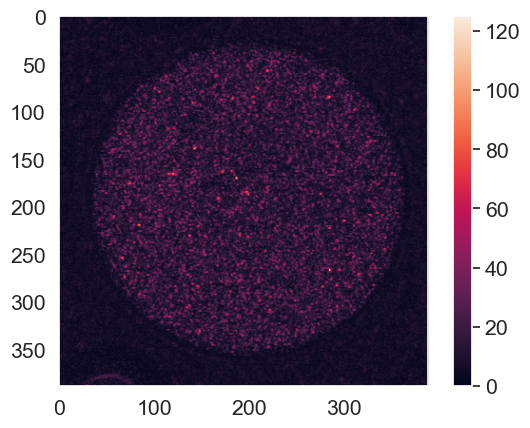

In [109]:
froot='/Volumes/T7red/silk_more/20240219/analysis/28min/'
fname = froot+'28min.raw'
metadata_fname = froot+'28min.ini'
mi_file = MI.MIfile(fname, metadata_fname)
mi_file.OpenForReading()
full_frame = mi_file.GetImage(0)
plt.imshow(full_frame)
plt.colorbar()
plt.grid(False)
print(mi_file.MetaData)

In [45]:
test_ROI=[0,0,-1,-1]
KernelSpecs.SetPadding(True)
corrmap = CM.CorrMaps(mi_file, froot, [200], KernelSpecs, imgRange=[0,300,1], cropROI=test_ROI)
cmap_list = corrmap.Compute(silent=False, return_maps=True)
with open(froot+'cmap_list.pkl', 'wb') as file:
    # Use pickle.dump() to serialize and save the list to the file
    pickle.dump(cmap_list, file)

Computing correlation maps:
  STEP 1: Loading images and computing average intensity...
  STEP 2: Computing contrast...
  STEP 3: Computing correlations...
     ...lag 200
Procedure completed in 31.3 seconds!


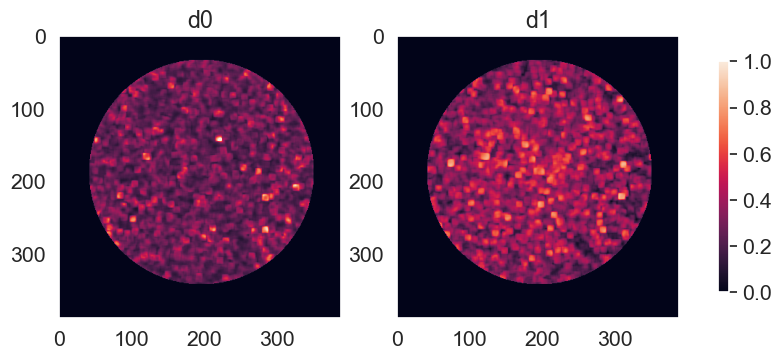

In [112]:
center=[187,196]
radius_outer=(319-9)/2

with open(froot+'cmap_list.pkl', 'rb') as file:
    # Use pickle.load() to deserialize the pickled list
    cmap_list = pickle.load(file)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tidx = 11
lagidx = 1
ax1.set_title('d0')
ax1.imshow(mask_heatmap(center,radius_outer,cmap_list[0][tidx]), vmin=0.0, vmax=1.0)
ax1.grid(False)
ax2.set_title('d'+str(lagidx))
cbar = ax2.imshow(mask_heatmap(center,radius_outer, np.mean(np.stack(cmap_list[lagidx][0:50]), axis=0)), vmin=0.0, vmax=1.0)
ax2.grid(False)
fig.colorbar(cbar, ax=[ax1, ax2], shrink=0.5)

In [35]:
corr_maps = CM.LoadFromConfig(os.path.join(froot, 'CorrMapsConfig.ini'), outFolder=froot)
print(corr_maps)



|-----------------|
| CorrMaps class: |
|-----------------+---------------
| MI input        : <MIfile: 0+485x389x389x1 bytes>
| output folder   : /Volumes/T7red/silk_more/20240219/analysis/28min/
| lag times (01)  : [200]
| image range     : [0, 300, 1]
| crop ROI        : [0, 0, 389, 389]
| Kernel          : <Kernel [2D Gauss], 9x9, s=(3.2;3.2)>
|-----------------+---------------


# Sample2 15min


|---------------|
| Config class: |
|---------------+---------------
| Section count : 1
| Total keys    : 5
| MIfile        : <5 keys>
|                 hdr_len = 0
|                 px_format = B
|                 fps = 1
|                 px_size = 1
|                 shape = [657, 389, 389]
|---------------+---------------


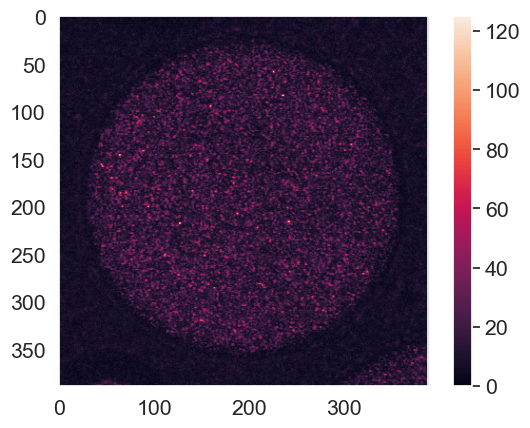

In [65]:
froot='/Volumes/T7red/silk_more/20240219/analysis/15min/'
fname = froot+'15min.raw'
metadata_fname = froot+'15min.ini'
mi_file = MI.MIfile(fname, metadata_fname)
mi_file.OpenForReading()
full_frame = mi_file.GetImage(0)
plt.imshow(full_frame)
plt.colorbar()
plt.grid(False)
print(mi_file.MetaData)

In [66]:
test_ROI=[0,0,-1,-1]
KernelSpecs.SetPadding(True)
corrmap = CM.CorrMaps(mi_file, froot, [200], KernelSpecs, imgRange=[0,300,1], cropROI=test_ROI)
cmap_list = corrmap.Compute(silent=False, return_maps=True)
with open(froot+'cmap_list.pkl', 'wb') as file:
    # Use pickle.dump() to serialize and save the list to the file
    pickle.dump(cmap_list, file)

Computing correlation maps:
  STEP 1: Loading images and computing average intensity...
  STEP 2: Computing contrast...
  STEP 3: Computing correlations...
     ...lag 200
Procedure completed in 32.0 seconds!


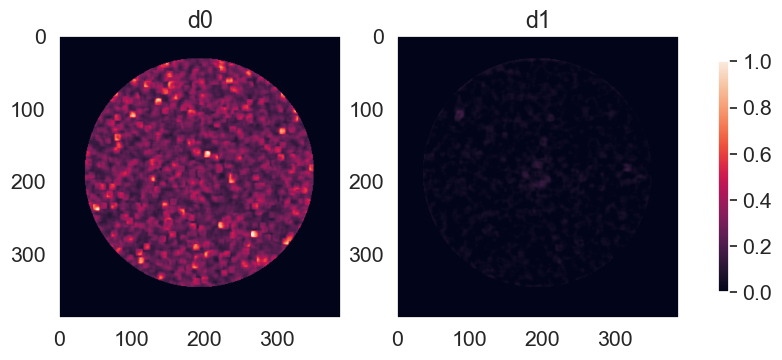

In [107]:
center=[188,193]
radius_outer=317/2

with open(froot+'cmap_list.pkl', 'rb') as file:
    # Use pickle.load() to deserialize the pickled list
    cmap_list = pickle.load(file)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tidx = 11
lagidx = 1
ax1.set_title('d0')
ax1.imshow(mask_heatmap(center,radius_outer,cmap_list[0][tidx]), vmin=0.0, vmax=1.0)
ax1.grid(False)
ax2.set_title('d'+str(lagidx))
cbar = ax2.imshow(mask_heatmap(center,radius_outer, np.mean(np.stack(cmap_list[lagidx][0:50]), axis=0)), vmin=0.0, vmax=1.0)
ax2.grid(False)
fig.colorbar(cbar, ax=[ax1, ax2], shrink=0.5)

# Sample2 26min


|---------------|
| Config class: |
|---------------+---------------
| Section count : 1
| Total keys    : 5
| MIfile        : <5 keys>
|                 hdr_len = 0
|                 px_format = B
|                 fps = 1
|                 px_size = 1
|                 shape = [751, 389, 389]
|---------------+---------------


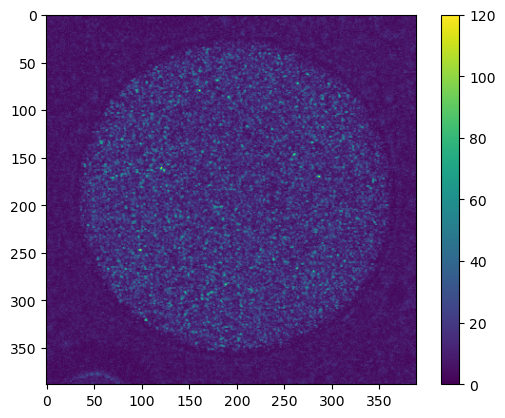

In [98]:
froot='/Volumes/T7red/silk_more/20240219/analysis/26min/'
fname = froot+'26min_derotate.raw'
metadata_fname = froot+'26min.ini'
mi_file = MI.MIfile(fname, metadata_fname)
mi_file.OpenForReading()
full_frame = mi_file.GetImage(0)
plt.imshow(full_frame)
plt.colorbar()
plt.grid(False)
print(mi_file.MetaData)

In [99]:
test_ROI=[0,0,-1,-1]
KernelSpecs.SetPadding(True)
corrmap = CM.CorrMaps(mi_file, froot, [200], KernelSpecs, imgRange=[0,300,1], cropROI=test_ROI)
cmap_list = corrmap.Compute(silent=False, return_maps=True)
with open(froot+'cmap_list.pkl', 'wb') as file:
    # Use pickle.dump() to serialize and save the list to the file
    pickle.dump(cmap_list, file)

Computing correlation maps:
  STEP 1: Loading images and computing average intensity...
  STEP 2: Computing contrast...
  STEP 3: Computing correlations...
     ...lag 200
Procedure completed in 29.5 seconds!


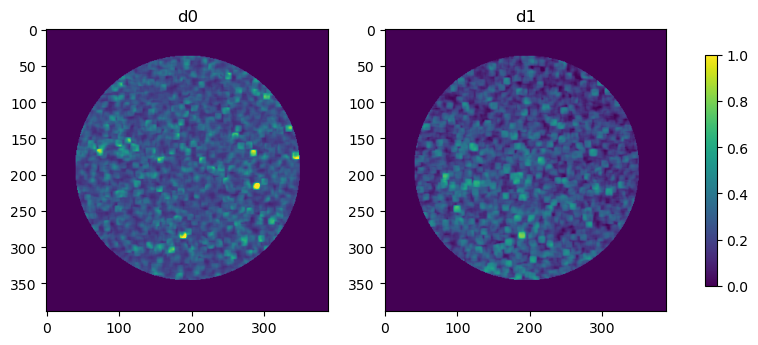

In [100]:
center=[191,195]
radius_outer=(319-9)/2

with open(froot+'cmap_list.pkl', 'rb') as file:
    # Use pickle.load() to deserialize the pickled list
    cmap_list = pickle.load(file)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tidx = 11
lagidx = 1
ax1.set_title('d0')
ax1.imshow(mask_heatmap(center,radius_outer,cmap_list[0][tidx]), vmin=0.0, vmax=1.0)
ax1.grid(False)
ax2.set_title('d'+str(lagidx))
cbar = ax2.imshow(mask_heatmap(center,radius_outer, np.mean(np.stack(cmap_list[lagidx][0:50]), axis=0)), vmin=0.0, vmax=1.0)
ax2.grid(False)
fig.colorbar(cbar, ax=[ax1, ax2], shrink=0.5)